In [ ]:
import pandas as pd
import numpy as np

import os
import sys
import unicodedata

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
def normalize_turkish_chars(text):
    normalized_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('ascii')
    return normalized_text

def find_emotion_by_path(path):
    parts = path.split("_")
    if len(parts) >= 4:  # Ensure there are at least 4 parts
        emotion = parts[3].split(".")[0]
        # Üzüntü1 gibi bir dosya adı var ama biz sadece üzüntüyü almak istiyoruz
        emotion = emotion[:-1]
        emotion = emotion.strip()  # Remove any leading/trailing whitespace
        emotion = normalize_turkish_chars(emotion)
        return emotion
    
def change_filename_without_turkish_chars(path):
    parts = path.split("_")
    if len(parts) >= 4:  # Ensure there are at least 4 parts
        emotion = parts[3].split(".")[0]
        # Üzüntü1 gibi bir dosya adı var ama biz sadece üzüntüyü almak istiyoruz
        emotion = emotion.strip()  # Remove any leading/trailing whitespace
        emotion = normalize_turkish_chars(emotion)
        new_path = parts[0] + "_" + parts[1] + "_" + parts[2] + "_" + emotion + ".wav"
        return new_path

    
def find_age_by_path(path):
    parts = path.split("_")
    if len(parts) >= 4:  # Ensure there are at least 4 parts
        age = parts[2]
        return age
    return path

def find_gender_by_path(path):
    parts = path.split("_")
    if len(parts) >= 4:  # Ensure there are at least 4 parts
        gender = parts[1]
        return gender
    return path

def find_nickname_by_path(path):
    parts = path.split("_")
    if len(parts) >= 4:  # Ensure there are at least 4 parts
        nickname = parts[0]
        return nickname
    return path
       

In [ ]:
AUDIO = "AUDIO/"
# Klipin adını ve yolunu birleştir
for file in os.listdir(AUDIO):
    #ignore .DS_Store file
    if file == ".DS_Store":
        continue
    nickname = find_nickname_by_path(file)
    age = find_age_by_path(file)
    gender = find_gender_by_path(file)
    emotion = find_emotion_by_path(file)
    new_path = change_filename_without_turkish_chars(file)
    if new_path is not None:
        os.rename(AUDIO + file, AUDIO + new_path)
    else:
        print(f"Error: Failed to change filename for {file}")



In [ ]:
file_emotion = []
file_path = []

for file in os.listdir(AUDIO):
    # Dosya adını ve yolunu birleştir
    #ignore .DS_Store file
    if file == ".DS_Store":
        continue
    print(AUDIO + file)
    file_path.append(AUDIO + file)
    # Dosya adından duygu kodunu al
    emotion = find_emotion_by_path(file)
    file_emotion.append(emotion)
    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
    path_df = pd.DataFrame(file_path, columns=['Path'])
    AUDIO_df = pd.concat([emotion_df, path_df], axis=1)
    AUDIO_df.head()

<Axes: xlabel='Emotions'>

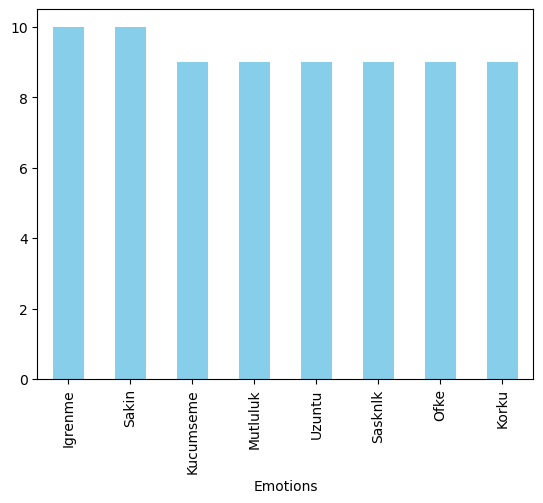

In [ ]:
data_path = AUDIO_df # is a dataframe that contains the path and the emotion of each audio file
data_path.to_csv("data_path.csv",index=False)
data_path.head()

data_path.Emotions.value_counts().plot(kind='bar', color='skyblue')


In [9]:
import matplotlib.pyplot as plt
import librosa.display

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    plt.plot(data)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

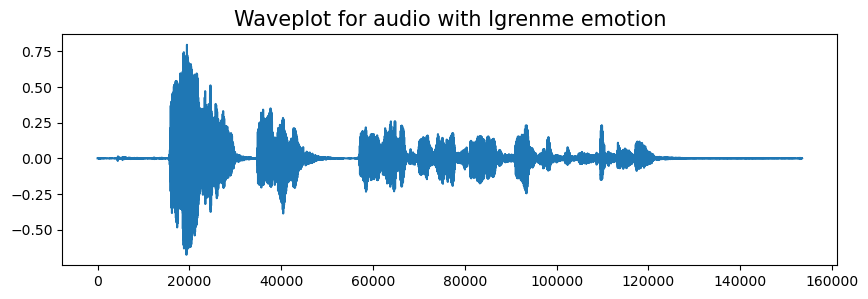

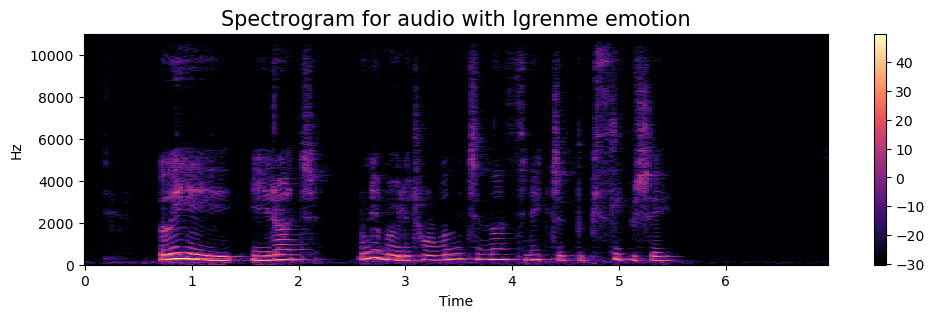

In [10]:
emotion = 'Igrenme'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)


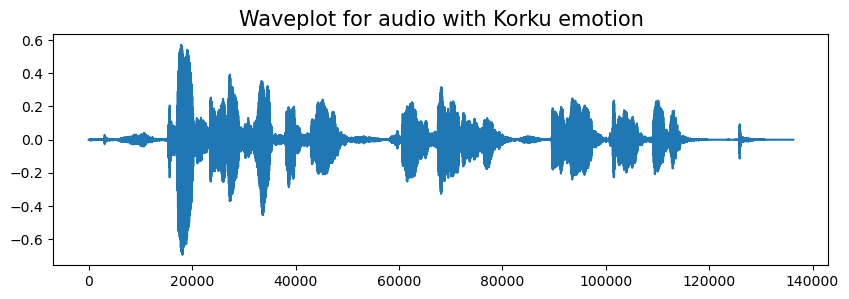

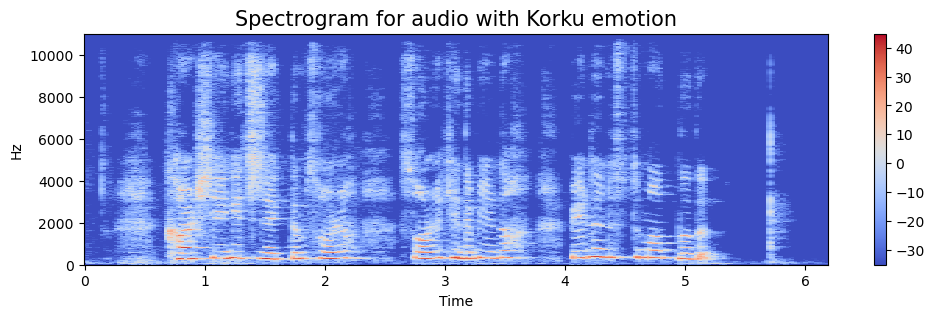

In [11]:
emotion = 'Korku'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

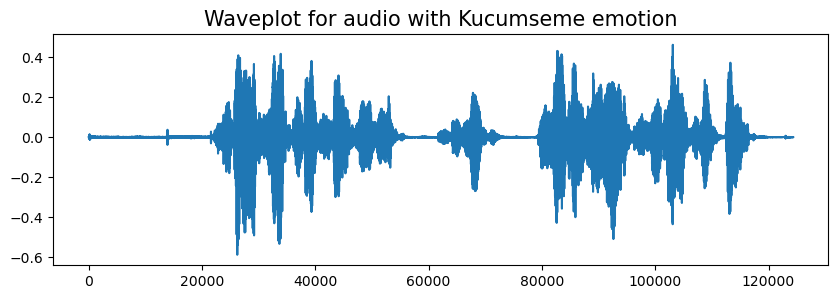

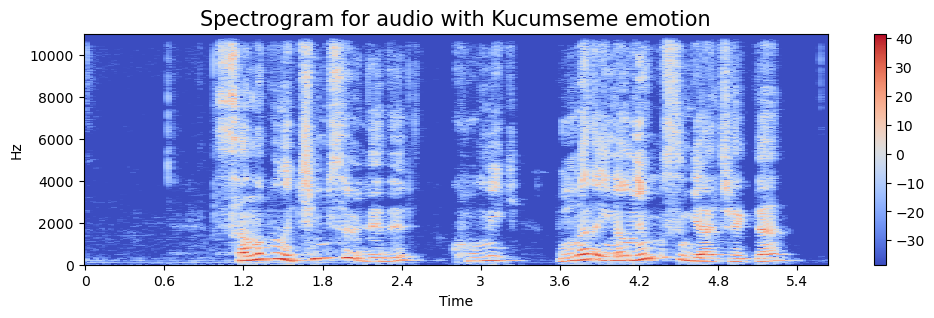

In [12]:
emotion = 'Kucumseme'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

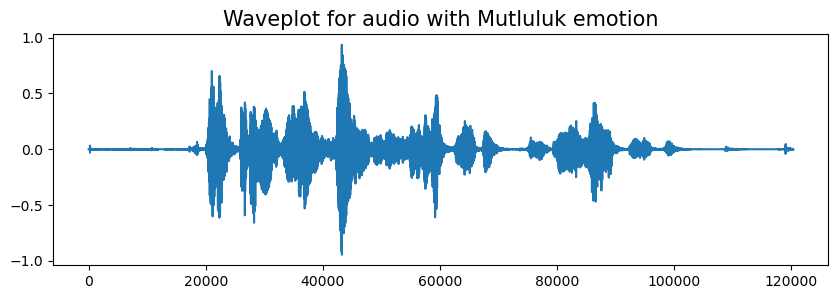

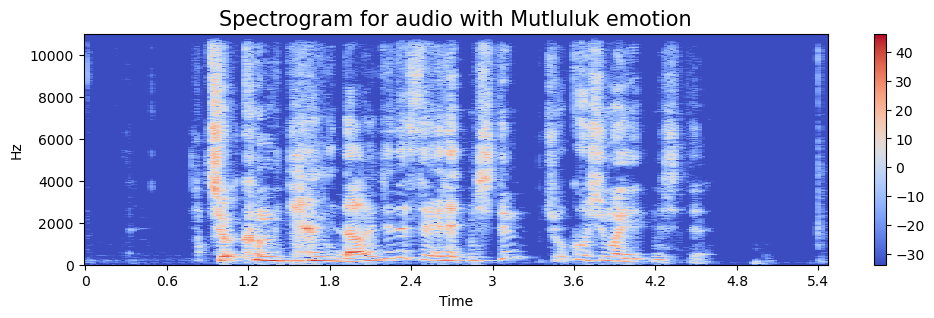

In [13]:
emotion = 'Mutluluk'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

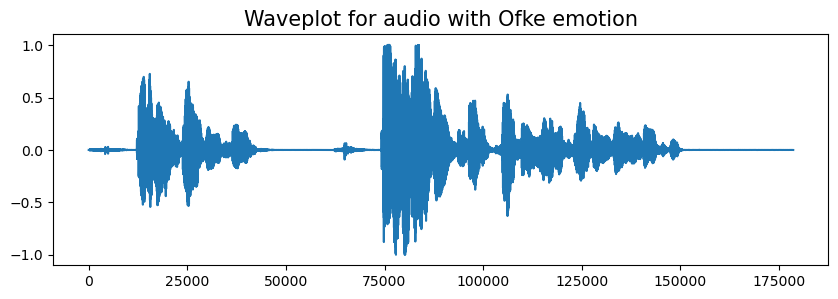

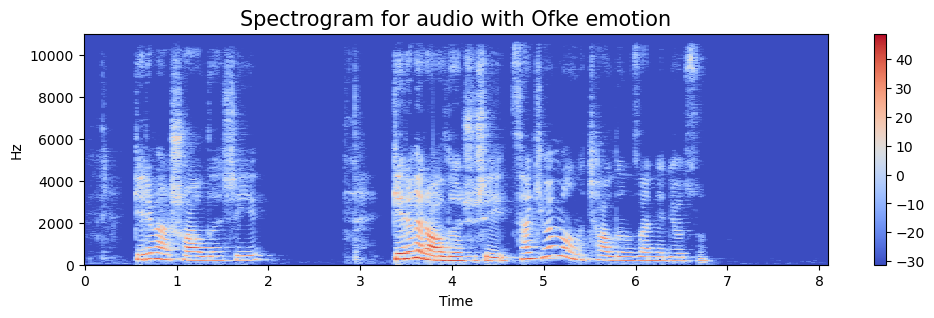

In [14]:
emotion = 'Ofke'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

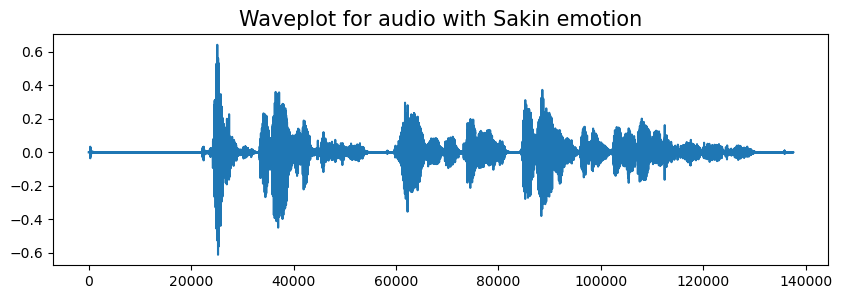

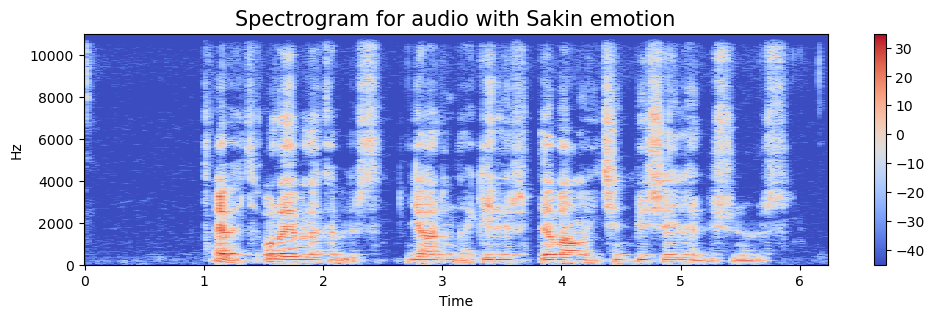

In [15]:
emotion = 'Sakin'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

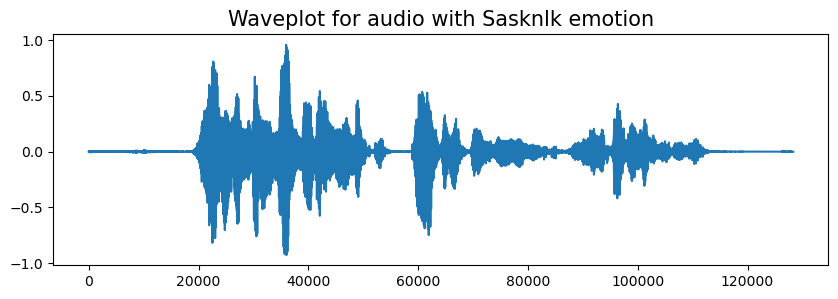

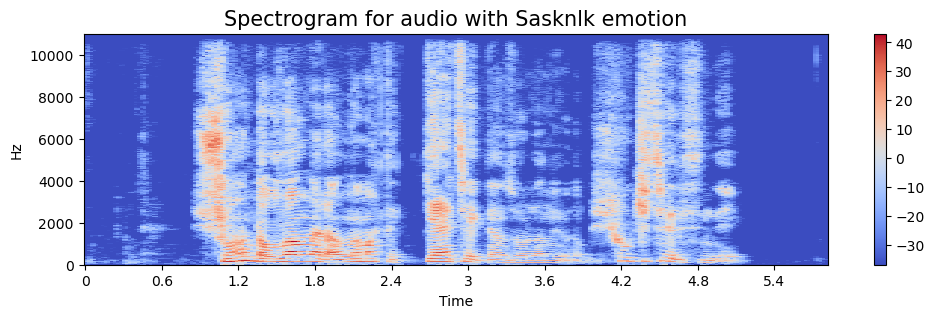

In [16]:
emotion = 'Sasknlk'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

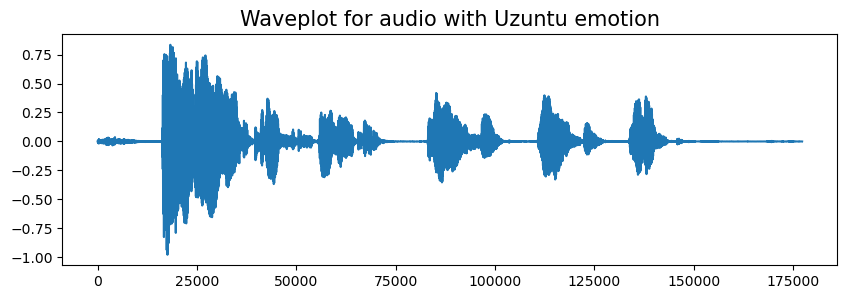

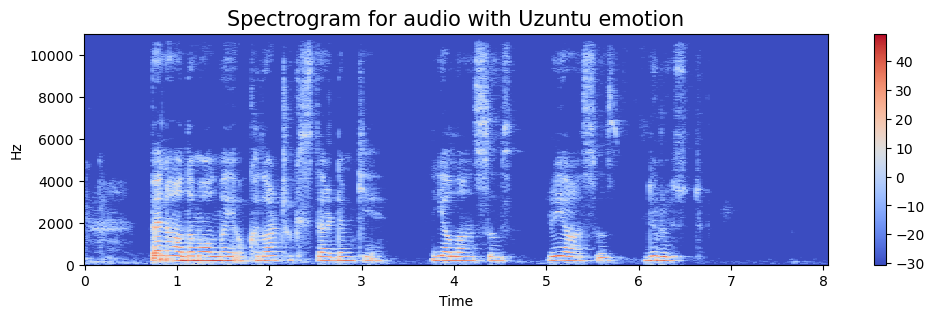

In [17]:
emotion = 'Uzuntu'
file_path = data_path[data_path.Emotions == emotion].Path.values[0]
data, sr = librosa.load(file_path)
create_waveplot(data, sr, emotion)
create_spectrogram(data, sr, emotion)

In [18]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

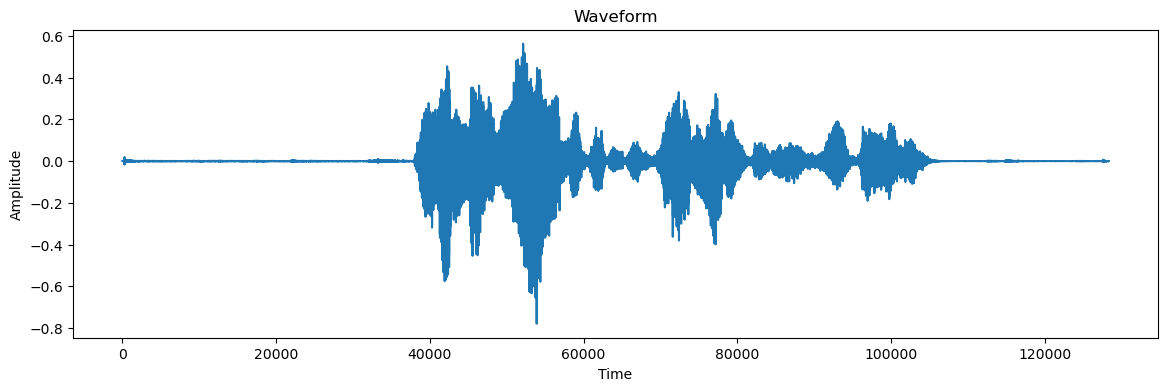

In [19]:
plt.figure(figsize=(14, 4))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


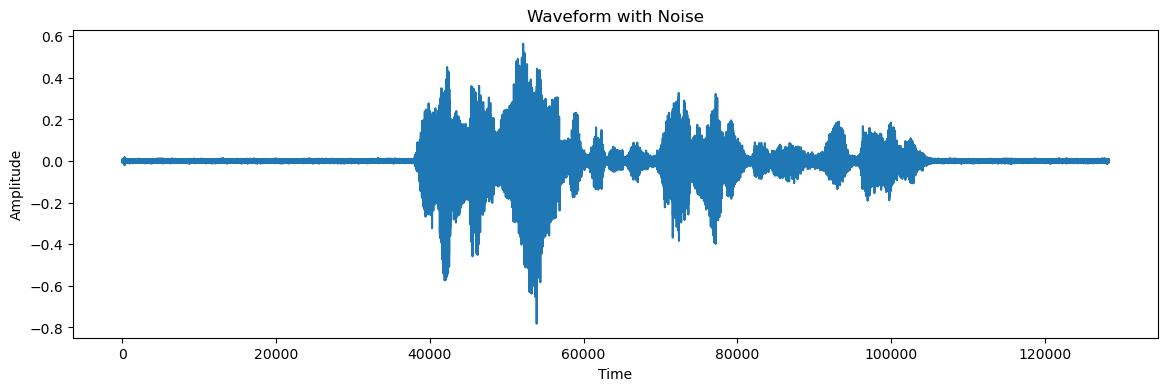

In [20]:
x = noise(data)
plt.figure(figsize=(14, 4))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Noise')
plt.show()


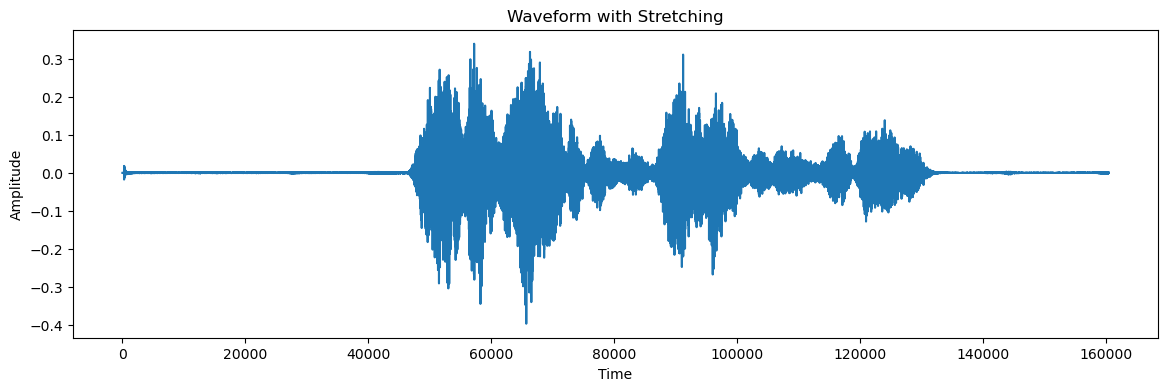

In [21]:
x = stretch(data, rate=0.8)
plt.figure(figsize=(14, 4))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Stretching')
plt.show()


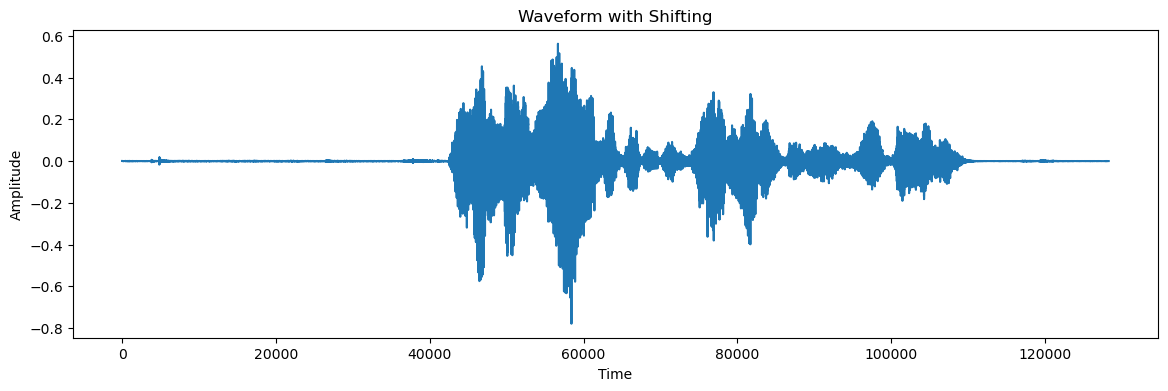

In [22]:
x = shift(data)
plt.figure(figsize=(14,4))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Shifting')
plt.show()

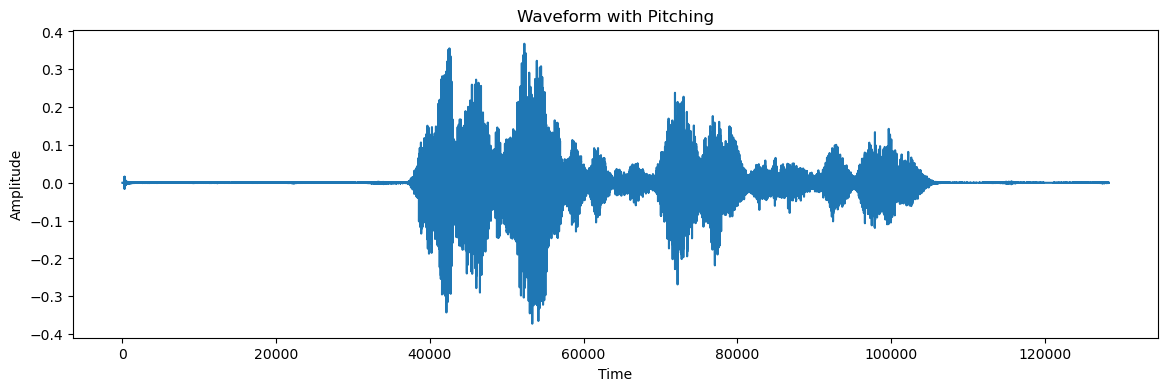

In [23]:
x = pitch(data, sample_rate, pitch_factor=0.7)
plt.figure(figsize=(14,4))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Pitching')
plt.show()


AŞAĞIDA DURATION VE OFFSET AYARLAYABİLİYOSUN İLERİDE KULLANIRSIN

In [24]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.

    # BURADA OFFSET VE DURATION DEĞERLERİNİ DEĞİŞTİREBİLİRSİNİZ.   data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    data, sample_rate = librosa.load(path)
   
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [25]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)
        

In [26]:
len(X), len(Y), data_path.Path.shape

(222, 222, (74,))

In [27]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.143153,0.601804,0.597425,0.603149,0.632340,0.544618,0.445333,0.456503,0.549731,0.614223,...,0.006621,0.008577,0.010560,0.009553,0.010068,0.015808,0.012345,0.008640,0.001014,Kucumseme
1,0.287158,0.711268,0.705591,0.722487,0.765178,0.719926,0.607697,0.571368,0.625025,0.671103,...,0.013372,0.015550,0.017649,0.017020,0.017415,0.023232,0.019560,0.015543,0.007730,Kucumseme
2,0.163658,0.658573,0.582578,0.579609,0.579271,0.571370,0.466606,0.414082,0.432395,0.503637,...,0.002378,0.001442,0.001614,0.001610,0.001964,0.001765,0.002345,0.002171,0.000115,Kucumseme
3,0.244592,0.687813,0.668568,0.693288,0.744424,0.680511,0.619852,0.633648,0.657990,0.658767,...,0.034283,0.024222,0.015084,0.017894,0.030990,0.030114,0.029386,0.012742,0.000895,Kucumseme
4,0.370129,0.778852,0.760759,0.791942,0.815585,0.786444,0.681559,0.669920,0.718686,0.739719,...,0.040983,0.030830,0.021491,0.024508,0.038061,0.035875,0.036377,0.019233,0.007378,Kucumseme



Data Preparation

In [28]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [29]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((166, 162), (166, 8), (56, 162), (56, 8))

In [31]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((166, 162), (166, 8), (56, 162), (56, 8))

In [32]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((166, 162, 1), (166, 8), (56, 162, 1), (56, 8))

MODEL SEQUENTIAL UNITS=13 KISMINI KENDİ DUYGU SAYINA GÖRE YAP

In [33]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 162, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 81, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 81, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 21, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.1307 - loss: 2.0999 - val_accuracy: 0.1607 - val_loss: 2.0638 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1555 - loss: 2.0485 - val_accuracy: 0.1964 - val_loss: 2.0088 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1783 - loss: 2.0231 - val_accuracy: 0.1607 - val_loss: 2.0043 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1822 - loss: 1.9672 - val_accuracy: 0.2321 - val_loss: 1.9814 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2602 - loss: 1.8919 - val_accuracy: 0.2143 - val_loss: 1.9707 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2969 - loss: 1.8433 - val_accuracy: 0.2679 - val_loss: 1.9634 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2671 - loss: 1.8043 - val_accuracy: 0.1786 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3958 - loss: 2.5101 
Accuracy of our model on test data :  37.5 %


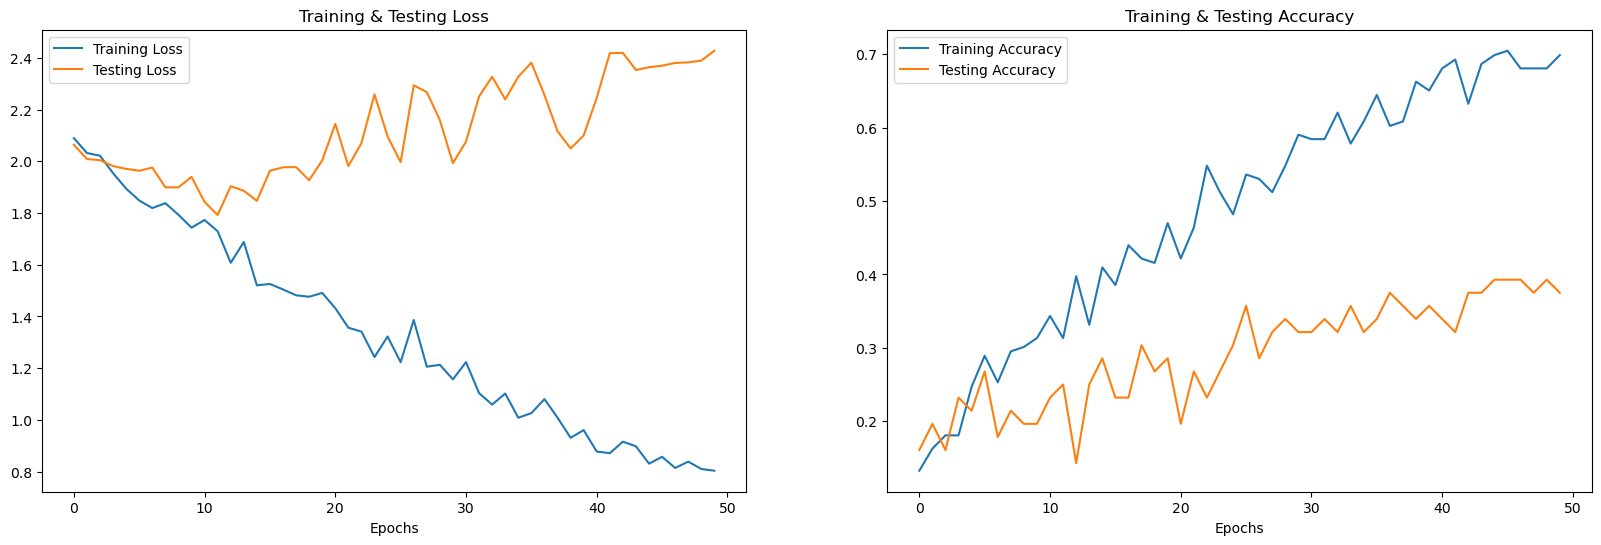

In [35]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [36]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [37]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,Kucumseme,Kucumseme
1,Mutluluk,Igrenme
2,Korku,Mutluluk
3,Korku,Sasknlk
4,Ofke,Korku
5,Ofke,Ofke
6,Korku,Korku
7,Mutluluk,Sasknlk
8,Sakin,Sasknlk
9,Mutluluk,Igrenme


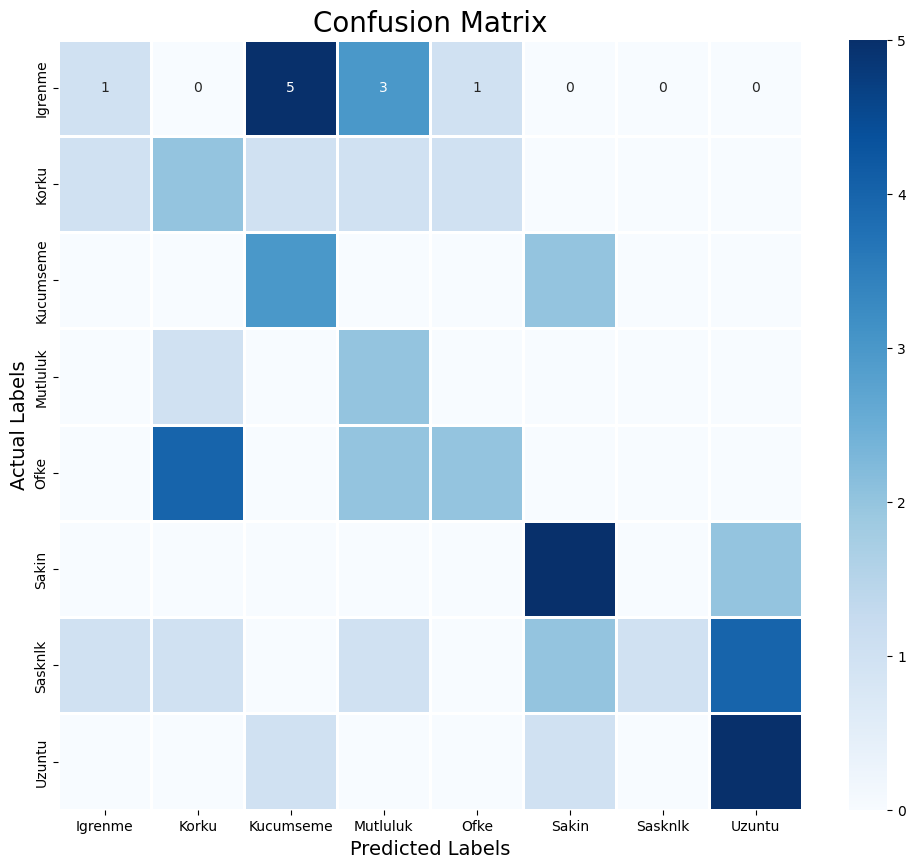

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Igrenme       0.33      0.10      0.15        10
       Korku       0.25      0.33      0.29         6
   Kucumseme       0.30      0.60      0.40         5
    Mutluluk       0.22      0.67      0.33         3
        Ofke       0.50      0.25      0.33         8
       Sakin       0.50      0.71      0.59         7
     Sasknlk       1.00      0.10      0.18        10
      Uzuntu       0.45      0.71      0.56         7

    accuracy                           0.38        56
   macro avg       0.45      0.43      0.35        56
weighted avg       0.49      0.38      0.33        56



In [ ]:
#modeli kaydetme
model.save("model.h5")
model.save("model.keras")


# StandardScaler'ı kaydetme
import joblib

joblib.dump(scaler, 'scaler.pkl')

# OneHotEncoder'ı kaydetme
joblib.dump(encoder, 'encoder.pkl')



['encoder.pkl']

In [ ]:
# Modeli yükleme
model = load_model('path_to_model.keras')

scaler = joblib.load('path_to_scaler.pkl')
encoder = joblib.load('path_to_encoder.pkl')

In [ ]:
def predict(path):
    data = get_features(path)
    data = scaler.transform(data)
    data = np.expand_dims(data, axis=2)
    pred = model.predict(data)
    pred = encoder.inverse_transform(pred)
    print("Predicted emotion of the audio is : ", pred[0][0])
    print(pred)

In [ ]:
path = 'path_to_audio_file'
predict(path)